In [ ]:
import pandas as pd
import os.path
import urllib.request
import json
from nltk.corpus import PlaintextCorpusReader
import nltk
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/work/socialgraph-witcher-analysis/data/cleaned_characters_attr.csv", index_col=0)

In [ ]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
def generate_text_corpus(df_characters): #choose title for list of all chars
    """
    Generates the text corpuses for the chosen attribute
    """
    data_root = r"data_all_clean"

    character_list = list(df_characters["title"].apply(lambda x: x + '.txt').values)
    wordlists = PlaintextCorpusReader(data_root, character_list)
    text = nltk.Text(wordlists.words())
    return text

In [ ]:
WitcherText = generate_text_corpus(df)

In [ ]:
def plot_freqdist(textcorpus, n):
    fdist = nltk.FreqDist(text)
    common = fdist.most_common(n)
    plt.figure(figsize = (18,8))
    fdist.plot(n, cumulative=False)

In [ ]:
x = WitcherText
stop_words = nltk.corpus.stopwords.words('english')
filtered_sentence = []
for word in x:
    if word not in stop_words:
        filtered_sentence.append(word)
text = nltk.Text(filtered_sentence)

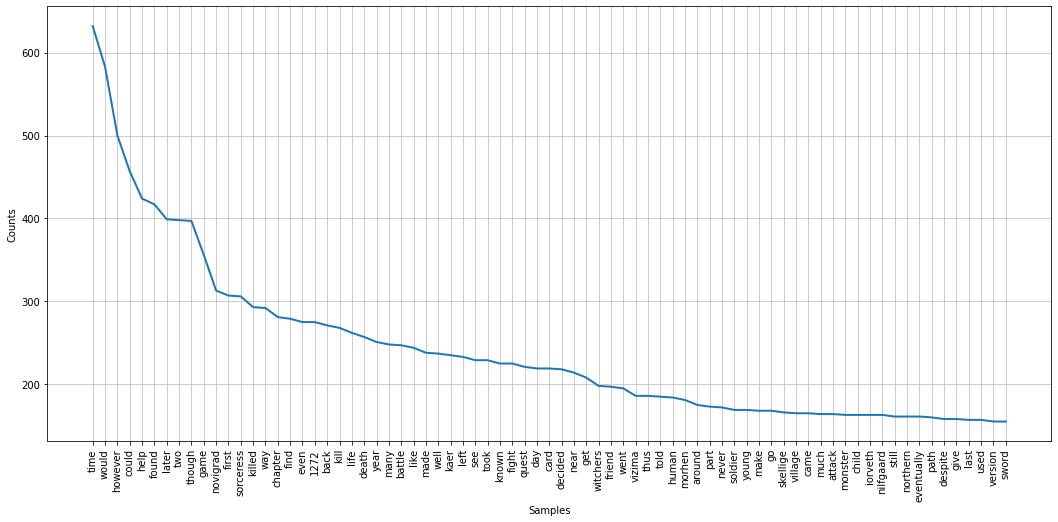

In [ ]:
plot_freqdist(text, 75)

<Text: throughout game several innkeeper there several innkeeper they...>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>